In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_benign = pd.read_csv("opcode_frequency_benign.csv", sep=',')
data_malware = pd.read_csv("opcode_frequency_malware.csv", sep=',')
data_benign['Class'] = 0
data_malware['Class'] = 1

In [3]:
data_benign.head()

,FileName,1,2,3,4,5,6,7,8,9,...,1800,1801,1802,1803,1804,1805,1806,1807,1808,Class
0,MSTORE.EXE.asm,15,1,4,102,62,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,transfig.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ResGen.ni.exe.asm,90,15,22,57,1167,24,42,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sdiff.exe.asm,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jmap.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_malware.head()

,FileName,1,2,3,4,5,6,7,8,9,...,1800,1801,1802,1803,1804,1805,1806,1807,1808,Class
0,e62c764a18642df4fc82886aa0b0e14cb54d6f1b.exe.asm,98,94,91,111,623,11,19,0,1,...,0,0,0,0,0,0,0,0,0,1
1,4eed533de4e01e1b22cf51417243d72438917991.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,a3a235dd1780d9e55c686c200852a5be6b0b81cc.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,892e7c8382943342a29a6ae5a55f2272532d8e04.exe.asm,205,207,216,171,1498,21,70,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0453aa68fe249901ca4f795480898914ed20553f.exe.asm,45,18,37,22,399,7,4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Columns: 1810 entries, FileName to Class
dtypes: int64(1809), object(1)
memory usage: 37.4+ MB


In [6]:
data_malware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Columns: 1810 entries, FileName to Class
dtypes: int64(1809), object(1)
memory usage: 56.1+ MB


In [7]:
data = pd.concat([data_benign, data_malware], ignore_index=True)
data.head()

,FileName,1,2,3,4,5,6,7,8,9,...,1800,1801,1802,1803,1804,1805,1806,1807,1808,Class
0,MSTORE.EXE.asm,15,1,4,102,62,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,transfig.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ResGen.ni.exe.asm,90,15,22,57,1167,24,42,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sdiff.exe.asm,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jmap.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Columns: 1810 entries, FileName to Class
dtypes: int64(1809), object(1)
memory usage: 93.5+ MB


In [9]:
data.isnull().values.any()

False

In [10]:
data.duplicated().sum()

0

In [11]:
# Notice that some columns have constant data throughout...for example:
data['1808'].unique()

array([0])

In [12]:
# Removing columns with constant data
data = data.loc[:, (data != data.iloc[0]).any()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Columns: 1232 entries, FileName to Class
dtypes: int64(1231), object(1)
memory usage: 63.6+ MB


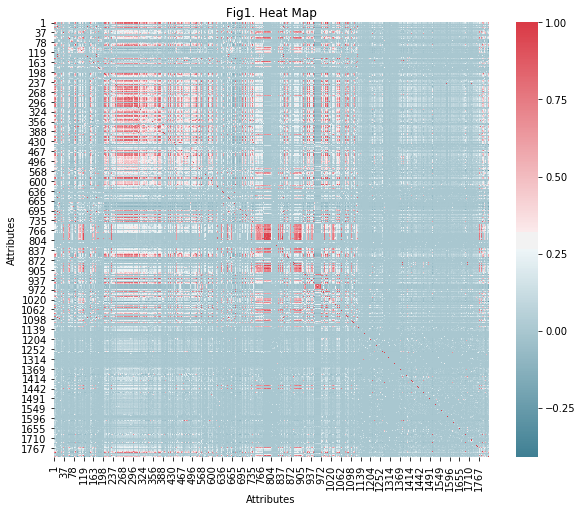

In [13]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.title('Fig1. Heat Map')
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.show()

In [14]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop=True)
data.head()

,FileName,1,2,3,4,5,6,7,8,9,...,1793,1794,1796,1799,1802,1804,1805,1806,1807,Class
0,f08f1667cda055a9eff0d0e286cc9b1ac3f96639.exe.asm,0,0,0,0,67,0,19,0,0,...,0,0,0,0,0,0,0,0,0,1
1,HPSERVICE.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,a0f6eb4d23fa29fee7b8c28270e64571db910437.exe.asm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,aspnet_regbrowsers.exe.asm,4,3,0,4,83,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,WLXCodecHost.exe.asm,1,1,0,8,23,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data1 = data.drop(['FileName'],axis=1)
data1.duplicated().sum()

1074

In [16]:
data1 = data1.drop_duplicates()
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695 entries, 0 to 6768
Columns: 1231 entries, 1 to Class
dtypes: int64(1231)
memory usage: 53.5 MB


In [17]:
y=data1['Class']
X=data1.drop(['Class'],axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,11,...,1792,1793,1794,1796,1799,1802,1804,1805,1806,1807
0,0,0,0,0,67,0,19,0,0,190,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,157,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,20046,...,0,0,0,0,0,0,0,0,0,0
3,4,3,0,4,83,6,1,0,0,1432,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,8,23,2,0,0,0,1944,...,1,0,0,0,0,0,0,0,0,0


In [18]:
X.duplicated().sum()
#so there is some row with all attributes same but different classes...

2

In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Class, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
#Performing Min_Max Normalization on data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train_Norm = pd.DataFrame(np_scaled)
X_train_Norm.head()

,0,1,2,3,4,5,6,7,8,9,...,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229
0,0.025063,0.022989,0.026718,0.028729,0.116402,0.011628,0.145161,0.0,0.0,0.127645,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.137845,0.482759,0.429389,0.208840,0.347596,0.104651,0.604839,0.0,0.0,0.087205,...,0.02439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000690,0.000000,0.000000,0.0,0.0,0.001130,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048872,0.140230,0.148855,0.086188,0.111111,0.063953,0.209677,0.0,0.5,0.045485,...,0.02439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.065789,0.195402,0.190840,0.149171,0.151139,0.034884,0.145161,0.0,0.0,0.132013,...,0.04878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Performing Min_Max Normalization on data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
X_test_Norm = pd.DataFrame(np_scaled)
X_test_Norm.head()

,0,1,2,3,4,5,6,7,8,9,...,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229
0,0.000000,0.000000,0.002183,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.008023,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.072126,0.455479,0.945415,0.168009,0.279817,0.035088,0.196970,0.0,0.0,0.252696,...,0.037037,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,0.001503,0.000000,0.017467,0.002301,0.023700,0.000000,0.000000,0.0,0.0,0.159053,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.126972,0.780822,0.475983,0.226697,0.481651,0.128655,0.318182,0.0,0.0,0.055940,...,0.037037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.143501,0.691781,0.351528,0.201381,0.474771,0.099415,0.659091,0.0,0.0,0.061333,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KNN Algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier
error_rate_train = []
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_Norm,y_train)
    pred_i_KNN = knn.predict(X_train_Norm)
    error_rate_train.append(np.mean(pred_i_KNN != y_train))
    
error_rate_test = []
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_Norm,y_train)
    pred_i_KNN = knn.predict(X_test_Norm)
    error_rate_test.append(np.mean(pred_i_KNN != y_test))

Text(0,0.5,'Error Rate')

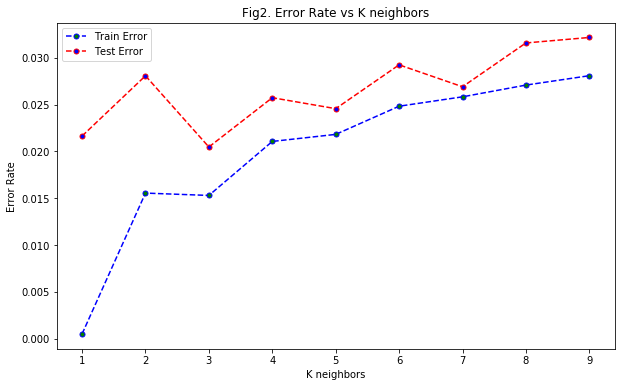

In [24]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,10),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,10),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Fig2. Error Rate vs K neighbors')
plt.xlabel('K neighbors')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [26]:
knn.score(X_test_Norm,y_test)

0.9795201872440024

In [27]:
y_pred_KNN = knn.predict(X_test_Norm)
y_pred_KNN

array([1, 1, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test, y_pred_KNN))

[[721   6]
 [ 29 953]]


In [29]:
print(classification_report(y_test, y_pred_KNN))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       727
          1       0.99      0.97      0.98       982

avg / total       0.98      0.98      0.98      1709



# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [31]:
lg.fit(X_train_Norm,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
lg.score(X_test_Norm,y_test)

0.9578700994733762

In [33]:
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
lg.score(X_test,y_test)

0.9701579871269749

In [35]:
y_pred_LR = lg.predict(X_test)
print(confusion_matrix(y_test, y_pred_LR))

[[715  12]
 [ 39 943]]


In [36]:
print(classification_report(y_test, y_pred_LR))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       727
          1       0.99      0.96      0.97       982

avg / total       0.97      0.97      0.97      1709



# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
error_rate_train = []
for i in range(10,40):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i_dt = dTree.predict(X_train)
    error_rate_train.append(np.mean(pred_i_dt != y_train))
    
error_rate_test = []
for i in range(10,40):
    
    dTree = DecisionTreeClassifier(max_depth=i)
    dTree.fit(X_train,y_train)
    pred_i_dt = dTree.predict(X_test)
    error_rate_test.append(np.mean(pred_i_dt != y_test))

Text(0,0.5,'Error Rate')

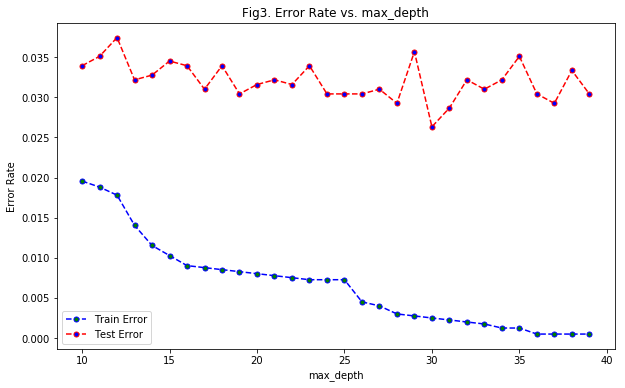

In [38]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(10,40),error_rate_train,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(10,40),error_rate_test,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Error","Test Error"])
plt.title('Fig3. Error Rate vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Error Rate')

In [39]:
dTree = DecisionTreeClassifier(max_depth=24)

In [40]:
dTree.fit(X_train_Norm,y_train)
dTree.score(X_test_Norm,y_test)

0.7255705090696314

In [41]:
dTree.fit(X_train,y_train)
dTree.score(X_test,y_test)

0.9695728496196606

In [42]:
y_pred_DT = dTree.predict(X_test)
print(confusion_matrix(y_test, y_pred_DT))

[[703  24]
 [ 28 954]]


In [43]:
print(classification_report(y_test, y_pred_DT))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       727
          1       0.98      0.97      0.97       982

avg / total       0.97      0.97      0.97      1709



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

score_train_RF = []
score_test_RF = []

for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    sc_train = rf.score(X_train,y_train)
    score_train_RF.append(sc_train)
    
for i in range(1,20,1):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    sc_test = rf.score(X_test,y_test)
    score_test_RF.append(sc_test)

Text(0,0.5,'Score')

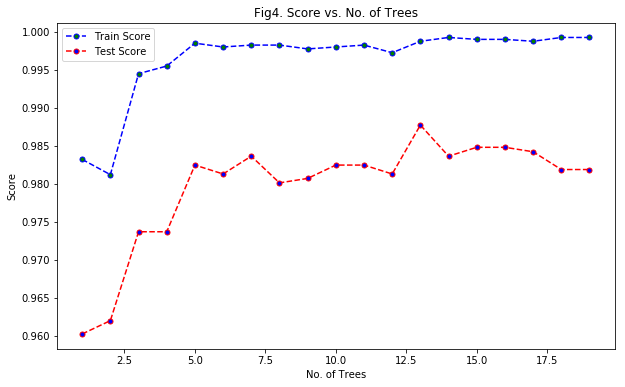

In [45]:
plt.figure(figsize=(10,6))
train_score,=plt.plot(range(1,20,1),score_train_RF,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=5)
test_score,=plt.plot(range(1,20,1),score_test_RF,color='red',linestyle='dashed',  marker='o',
         markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Score","Test Score"])
plt.title('Fig4. Score vs. No. of Trees')
plt.xlabel('No. of Trees')
plt.ylabel('Score')

In [46]:
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf.score(X_test,y_test)

0.9830310122878877

In [48]:
y_pred_RF = rf.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

array([[717,  10],
       [ 19, 963]])

In [49]:
print(classification_report(y_test, y_pred_RF))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       727
          1       0.99      0.98      0.99       982

avg / total       0.98      0.98      0.98      1709



# Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB as NB
nb = NB()

In [51]:
nb.fit(X_train_Norm,y_train)

GaussianNB(priors=None)

In [52]:
nb.score(X_test_Norm,y_test)

0.8970157987126974

In [53]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [54]:
nb.score(X_test,y_test)

0.9245172615564657

In [55]:
y_pred_NB = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred_NB))

[[710  17]
 [112 870]]


In [56]:
print(classification_report(y_test, y_pred_NB))

             precision    recall  f1-score   support

          0       0.86      0.98      0.92       727
          1       0.98      0.89      0.93       982

avg / total       0.93      0.92      0.92      1709



# Neural Network

In [57]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

seed = 7
np.random.seed(seed)

Using TensorFlow backend.


In [58]:
def create_baseline01():

    model = Sequential()
    model.add(Dense(1, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline03():

    model = Sequential()
    model.add(Dense(3, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline05():

    model = Sequential()
    model.add(Dense(5, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline07():

    model = Sequential()
    model.add(Dense(7, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline10():

    model = Sequential()
    model.add(Dense(10, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline20():

    model = Sequential()
    model.add(Dense(20, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline30():

    model = Sequential()
    model.add(Dense(30, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline40():

    model = Sequential()
    model.add(Dense(40, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_baseline50():

    model = Sequential()
    model.add(Dense(50, input_dim=1230, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [69]:
scores_train = []
scores_test = []

NN_train = KerasClassifier(build_fn=create_baseline01, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline03, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline05, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline07, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline10, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline20, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline30, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline40, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

NN_train = KerasClassifier(build_fn=create_baseline50, epochs=20, batch_size=10, verbose=0)
NN_train.fit(X_train,y_train)
sc_train = NN_train.score(X_train,y_train)
sc_test = NN_train.score(X_test,y_test)
scores_train.append(sc_train)
scores_test.append(sc_test)

Text(0,0.5,'Score')

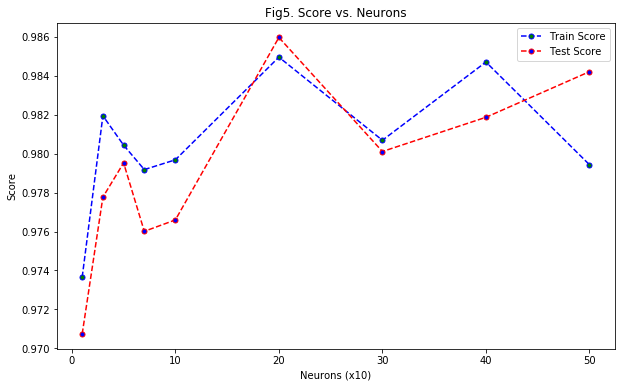

In [70]:
plt.figure(figsize=(10,6))
train_score,=plt.plot([1,3,5,7,10,20,30,40,50],scores_train,color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
test_score,=plt.plot([1,3,5,7,10,20,30,40,50],scores_test,color='red',linestyle='dashed',  marker='o', markerfacecolor='blue', markersize=5)
plt.legend( [train_score,test_score],["Train Score","Test Score"])
plt.title('Fig5. Score vs. Neurons')
plt.xlabel('Neurons (x10)')
plt.ylabel('Score')

In [85]:
NN = KerasClassifier(build_fn=create_baseline05, epochs=20, batch_size=10, verbose=0)
NN.fit(X_train,y_train)
NN.score(X_test,y_test)

0.9806904580036474

In [86]:
y_pred_NN = NN.predict(X_test)
print(confusion_matrix(y_test, y_pred_NN))

[[716  11]
 [ 22 960]]


In [87]:
print(classification_report(y_test, y_pred_NN))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       727
          1       0.99      0.98      0.98       982

avg / total       0.98      0.98      0.98      1709



# Cross Validation

In [88]:
#Performing Min_Max Normalization on data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_Norm = pd.DataFrame(np_scaled)
X_Norm.head()

,0,1,2,3,4,5,6,7,8,9,...,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229
0,0.000000,0.000000,0.0,0.00000,0.015413,0.000000,0.143939,0.0,0.0,0.007154,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.005912,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.754801,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.002506,0.006897,0.0,0.00442,0.019094,0.034884,0.007576,0.0,0.0,0.053920,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000627,0.002299,0.0,0.00884,0.005291,0.011628,0.000000,0.0,0.0,0.073198,...,0.02439,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(knn, X_Norm, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.98340358 0.98314459 0.98498815] 
Test Accuracy for 3 folds =  [0.96682464 0.97471022 0.9768177 ]
Train F1 Score for 3 folds =  [0.98548721 0.98526025 0.98685121] 
Test F1 Score  for 3 folds =  [0.97062937 0.97771588 0.97966728]
Train Recall for 3 folds =  [0.9793956  0.97894737 0.97894737] 
Test Recall  for 3 folds =  [0.95242452 0.96428571 0.97069597]
Train Precision for 3 folds =  [0.99165508 0.99165508 0.99488372] 
Test Precision for 3 folds =  [0.98954373 0.99152542 0.98880597]


In [90]:
cv_results = cross_validate(lg, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.97892518 0.97893073 0.97577035] 
Test Accuracy for 3 folds =  [0.96366509 0.96575342 0.97629083]
Train F1 Score for 3 folds =  [0.98152425 0.98150717 0.97864438] 
Test F1 Score  for 3 folds =  [0.9679219  0.96986555 0.97917631]
Train Recall for 3 folds =  [0.97298535 0.97162471 0.96475973] 
Test Recall  for 3 folds =  [0.95242452 0.95787546 0.96886447]
Train Precision for 3 folds =  [0.99021435 0.99159271 0.99293453] 
Test Precision for 3 folds =  [0.98393195 0.98215962 0.98971001]


In [91]:
cv_results = cross_validate(dTree, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.99920969 0.99973663 0.99868317] 
Test Accuracy for 3 folds =  [0.96419168 0.96786091 0.97471022]
Train F1 Score for 3 folds =  [0.99931271 0.99977111 0.99885452] 
Test F1 Score  for 3 folds =  [0.96866359 0.97203118 0.97806216]
Train Recall for 3 folds =  [0.99862637 0.99954233 0.99771167] 
Test Recall  for 3 folds =  [0.96157365 0.97069597 0.97985348]
Train Precision for 3 folds =  [1. 1. 1.] 
Test Precision for 3 folds =  [0.97585887 0.97337006 0.97627737]


In [92]:
cv_results = cross_validate(rf, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.9955216  0.99604951 0.99552278] 
Test Accuracy for 3 folds =  [0.97209057 0.97629083 0.97629083]
Train F1 Score for 3 folds =  [0.99610717 0.99656515 0.99610717] 
Test F1 Score  for 3 folds =  [0.97567692 0.97934832 0.97936726]
Train Recall for 3 folds =  [0.99587912 0.99588101 0.99542334] 
Test Recall  for 3 folds =  [0.97255261 0.97710623 0.97802198]
Train Precision for 3 folds =  [0.99633532 0.99725023 0.99679193] 
Test Precision for 3 folds =  [0.97882136 0.98160074 0.98071625]


In [93]:
cv_results = cross_validate(nb, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.92755532 0.92230708 0.91572294] 
Test Accuracy for 3 folds =  [0.90205371 0.92149631 0.92781876]
Train F1 Score for 3 folds =  [0.93391012 0.92862328 0.92210321] 
Test F1 Score  for 3 folds =  [0.90909091 0.92812349 0.93460621]
Train Recall for 3 folds =  [0.88965201 0.87826087 0.86681922] 
Test Recall  for 3 folds =  [0.85086917 0.88095238 0.89652015]
Train Precision for 3 folds =  [0.98280223 0.98511294 0.9849194 ] 
Test Precision for 3 folds =  [0.97586569 0.98063201 0.97607178]


In [94]:
cv_results = cross_validate(NN, X, y, cv=3,scoring=('accuracy','f1','recall','precision'), return_train_score=True)
print(cv_results.keys())
print("Train Accuracy for 3 folds= ",cv_results['train_accuracy'],"\nTest Accuracy for 3 folds = ",cv_results['test_accuracy'])
print("Train F1 Score for 3 folds = ",cv_results['train_f1'],"\nTest F1 Score  for 3 folds = ",cv_results['test_f1'])
print("Train Recall for 3 folds = ",cv_results['train_recall'],"\nTest Recall  for 3 folds = ",cv_results['test_recall'])
print("Train Precision for 3 folds = ",cv_results['train_precision'],"\nTest Precision for 3 folds = ",cv_results['test_precision'])

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'train_accuracy', 'test_f1', 'train_f1', 'test_recall', 'train_recall', 'test_precision', 'train_precision'])
Train Accuracy for 3 folds=  [0.98182297 0.97181986 0.9683961 ] 
Test Accuracy for 3 folds =  [0.96471827 0.97207587 0.97312961]
Train F1 Score for 3 folds =  [0.98382181 0.97536265 0.9719888 ] 
Test F1 Score  for 3 folds =  [0.96950387 0.97510568 0.97597739]
Train Recall for 3 folds =  [0.9712963  0.96448087 0.94722475] 
Test Recall  for 3 folds =  [0.95344673 0.96022202 0.96014829]
Train Precision for 3 folds =  [0.99667458 0.98649278 0.99808245] 
Test Precision for 3 folds =  [0.98611111 0.99045802 0.99233716]


In [112]:
y_pred_ensemble = y_pred_NN

for i in range(len(X_test)):
    value = 0.33*(y_pred_KNN[i] + y_pred_RF[i] + y_pred_NN[i])
    if value>0.5:
        y_pred_ensemble[i] = 1
    else:
        y_pred_ensemble[i] = 0
        
y_pred_ensemble

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [113]:
print(confusion_matrix(y_test, y_pred_ensemble))

[[722   5]
 [ 20 962]]


In [114]:
print(classification_report(y_test, y_pred_ensemble))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       727
          1       0.99      0.98      0.99       982

avg / total       0.99      0.99      0.99      1709

